In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part - I 一般数据

In [3]:
data = pd.read_csv('ex2data1.txt', names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


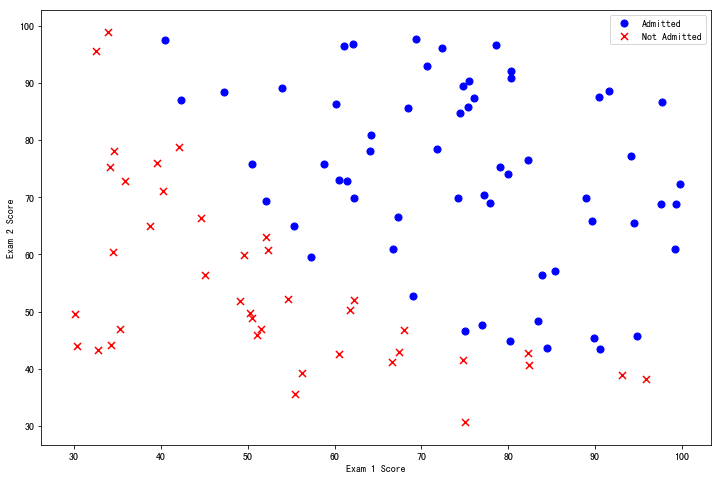

In [10]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

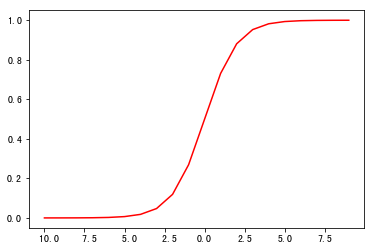

In [15]:
nums_temp = np.arange(-10, 10, step=1)
plt.plot(nums_temp, sigmoid(nums_temp), 'r')
plt.show()

In [16]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1- sigmoid(X @ theta)))

In [18]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
data.insert(0, 'ones', 1)

In [20]:
data.head()

,ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [27]:
X = np.array(data.iloc[:,:-1].values)
y = np.array(data.iloc[:, -1].values)
theta = np.zeros(X.shape[1])
print(X.shape, y.shape, theta.shape)

(100, 3) (100,) (3,)


In [28]:
# 初始cost
cost(theta, X, y)

0.6931471805599453

In [29]:
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X@theta) - y)

In [30]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [31]:
import scipy.optimize as opt
result = opt.minimize(fun=cost, x0=theta, args=(X, y), method='TNC', jac=gradient)
result

     fun: 0.20349770158947475
     jac: array([9.05596099e-09, 9.04688635e-08, 4.79272062e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131859,   0.20623159,   0.20147149])

In [32]:
# 优化后的cost
cost(result.x, X, y)

0.20349770158947475

In [58]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob>=0.5).astype(int)

In [59]:
best_theta = result.x
predictions = predict(X, best_theta)
correct = [1 if a == b else 0 for (a, b) in zip(predictions, y)]
np.mean(correct)

0.89

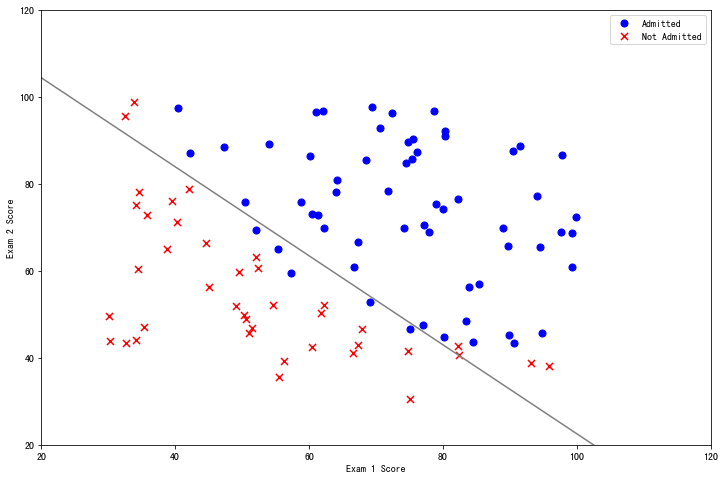

In [63]:
coef = -(result.x / result.x[2])
x_ = np.arange(130, step=.1)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_xlim(20,120)
ax.set_ylim(20,120)
plt.plot(x_, coef[0] + coef[1]*x_, 'grey')
plt.show()

## Part - II 需要正则化的数据

In [98]:
data2 = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


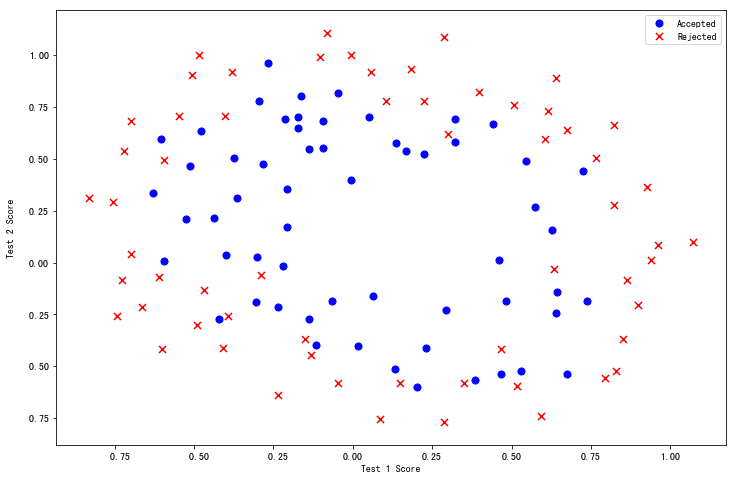

In [99]:
positive_2 = data2[data2['Accepted'].isin([1])]
negative_2 = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive_2['Test 1'], positive_2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative_2['Test 1'], negative_2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [100]:
x1 = data2['Test 1']
x2 = data2['Test 2']
data2.insert(3, 'ones', 1)
data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

In [101]:
# 特征映射
power = 4
for i in range(1, power+1):
    for j in range(i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.head()

,Accepted,ones,F10,F01,F20,F11,F02,F30,F21,F12,F03,F40,F31,F22,F13,F04
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


In [106]:
def regularized_cost(theta, X, y, lambda_=1):
    theta_1_to_n = theta[1:]
    regularized_term = (lambda_ / (2 * len(X))) * (np.power(theta_1_to_n, 2)).sum()
    return cost(theta, X, y) + regularized_term

In [109]:
def regularized_gradient(theta, X, y, lambda_=1):
    theta_1_to_n = theta[1:]
    regularized_theta = (lambda_ / len(X)) * theta_1_to_n
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient(theta, X, y) + regularized_term

In [103]:
X2 = np.array(data2.iloc[:, 1:])
y2 = np.array(data2.iloc[:,0])
theta2 = np.zeros(X2.shape[1])
print(X2.shape, y2.shape, theta2.shape)

(118, 15) (118,) (15,)


In [104]:
regularized_cost(theta2, X2, y2)

0.6931471805599454

In [110]:
regularized_gradient(theta2, X2, y2)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02])

In [111]:
result2 = opt.minimize(fun=regularized_cost, x0=theta2, args=(X2, y2), method='TNC', jac=regularized_gradient)
result2

     fun: 0.5436373294073118
     jac: array([ 3.00996680e-07,  1.51507327e-06, -9.89646978e-08,  4.39348835e-07,
        1.15730397e-06, -2.03095114e-07,  4.05849596e-07, -1.83802212e-07,
        2.43255542e-07, -4.66445894e-07,  3.77614068e-07,  5.41522181e-07,
       -8.74056677e-09,  6.87192192e-07, -1.44575987e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 6
  status: 1
 success: True
       x: array([ 1.28775612,  0.56747242,  1.11842249, -2.20672757, -0.92832319,
       -1.6252177 , -0.03664128, -0.36909356, -0.33634634, -0.47660815,
       -1.67872047, -0.05978774, -0.62663106, -0.26311977, -1.5485849 ])

In [112]:
best_theta = result2.x
predictions = predict(X2, best_theta)
correct = [1 if a == b else 0 for (a,b) in zip(predictions, y2)]
np.mean(correct)

0.8220338983050848